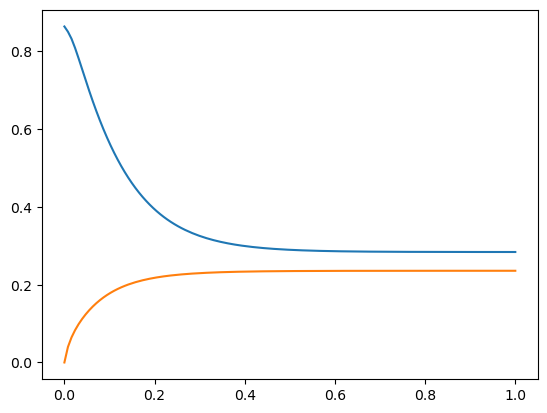

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import finite_dipole as fdm

eps_stack = 1, 1.52 + 0.83j, 1, 13.7  # e.g. Air, PMMA, Air, Si
beta_stack = fdm.reflection.refl_coeff(eps_stack[:-1], eps_stack[1:])
t_stack = np.array([50, 5])
k = np.linspace(0, 1, 128)


@njit
def beta_k(k, beta_stack, t_stack):
    beta_effective = beta_stack[0] * np.ones_like(k)
    for i in range(t_stack.shape[0]):
        layer_decay = np.exp(-2 * k * t_stack[i])
        beta_effective = (beta_effective + beta_stack[i + 1] * layer_decay) / (
            1 + beta_effective * beta_stack[i + 1] * layer_decay
        )
    return beta_effective


plt.plot(k, beta_k(k, beta_stack, t_stack).real)
plt.plot(k, beta_k(k, beta_stack, t_stack).imag)